# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams['text.latex.preamble']= r"\usepackage{lmodern}"
params = {'text.usetex' : True,
          'font.size' : 11,
          'font.family' : 'lmodern'
          }
plt.rcParams.update(params)

In [2]:
from measures import lts_measure
from misc_func import generate_state_seq
from postprocessing import find_projection

In [7]:
fs = 1000 # sampling frequency
l = 60 # length of the recording in seconds

df = pd.DataFrame()
df['time'] = np.linspace(0, l, fs * l)
df['correct'] = 1
df.loc[df.time >  5, 'correct'] = 2
df.loc[df.time > 15, 'correct'] = 3
df.loc[df.time > 30, 'correct'] = 2
df.loc[df.time > 40, 'correct'] = 3
df.loc[df.time > 55, 'correct'] = 1
df['est'] = 0

# Simulation study

## Small $\mu_2$

In [11]:
# parameters of the LTS measure
w = 0.6
sigma = 0.35
lam = 0.01
zeta = 0.5

gamma = 0.5 # parameter of post-processing

# parameters of the generated state sequence
mu_1 = 100
mu_2_array = [10, 20, 30, 40, 50, 60, 70, 80, 90]

big_table = []

for mu_2 in mu_2_array:
    accuracy_table = []
    measure_table_est = []
    measure_table_pp = []
    for loop_idx in range(1000):
        is_correct, wrong_states = generate_state_seq(mu_1, mu_2)

        df['iscorrect'] = is_correct
        df.loc[df.iscorrect, 'est'] = df.correct
        df.loc[df.iscorrect == False, 'est'] = wrong_states
        
        df['postproc'] = find_projection(df.est, gamma, fs)

        lts_est_current = lts_measure(df.correct, df.est, fs, w, sigma, lam, zeta)
        lts_pp_current = lts_measure(df.correct, df.postproc, fs, w, sigma, lam, zeta)

        accuracy_table.append(round(np.mean(is_correct), 2))
        measure_table_est.append(round(lts_est_current, 3))
        measure_table_pp.append(round(lts_pp_current, 3))
    
    big_table.append([mu_2, 
                      round(np.mean(accuracy_table), 3),
                      round(np.mean(measure_table_est), 3),
                      round(np.mean(measure_table_pp), 3)])

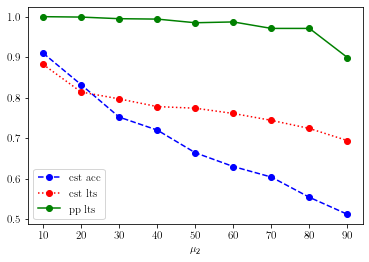

In [12]:
bt_df = pd.DataFrame(big_table)
bt_df.columns = ['mu', 'est_accuracy', 'est_lts', 'pp_lts']
bt_df
plt.plot(bt_df['mu'], bt_df['est_accuracy'], '--bo', label = 'est acc')
plt.plot(bt_df['mu'], bt_df['est_lts'], ':ro', label = 'est lts')
plt.plot(bt_df['mu'], bt_df['pp_lts'], '-go', label = 'pp lts')
plt.legend()
plt.xlabel('$\mu_2$')
plt.savefig('fig3.jpg', dpi = 600)
plt.show()

## Big $\mu_2$

In [13]:
# parameters of the generated state sequence
mu_1 = 1000
mu_2_array = [100, 200, 300, 400, 500, 600, 700, 800, 900]

big_table = []

for mu_2 in mu_2_array:
    accuracy_table = []
    measure_table_est = []
    measure_table_pp = []
    for loop_idx in range(1000):
        is_correct, wrong_states = generate_state_seq(mu_1, mu_2)

        df['iscorrect'] = is_correct
        df.loc[df.iscorrect, 'est'] = df.correct
        df.loc[df.iscorrect == False, 'est'] = wrong_states
        
        df['postproc'] = find_projection(df.est, gamma, fs)

        lts_est_current = lts_measure(df.correct, df.est, fs, w, sigma, lam, zeta)
        lts_pp_current = lts_measure(df.correct, df.postproc, fs, w, sigma, lam, zeta)

        accuracy_table.append(round(np.mean(is_correct), 2))
        measure_table_est.append(round(lts_est_current, 3))
        measure_table_pp.append(round(lts_pp_current, 3))
    
    big_table.append([mu_2,
                      round(np.mean(accuracy_table), 3),
                      round(np.mean(measure_table_est), 3),
                      round(np.mean(measure_table_pp), 3)])

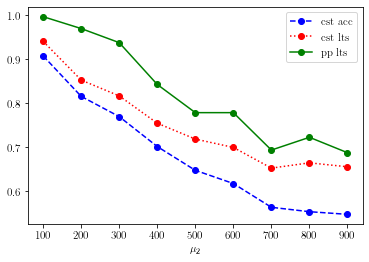

In [14]:
bt_df = pd.DataFrame(big_table)
bt_df.columns = ['mu', 'est_accuracy', 'est_lts', 'pp_lts']
bt_df
plt.plot(bt_df['mu'], bt_df['est_accuracy'], '--bo', label = 'est acc')
plt.plot(bt_df['mu'], bt_df['est_lts'], ':ro', label = 'est lts')
plt.plot(bt_df['mu'], bt_df['pp_lts'], '-go', label = 'pp lts')
plt.legend()
plt.xlabel('$\mu_2$')
plt.savefig('fig4.jpg', dpi = 600)
plt.show()

## $\gamma$

In [15]:
is_correct_array = []
wrong_states_array = []
mu_1 = 100
mu_2 = 80

for loop_idx in range(1000):
    is_correct, wrong_states = generate_state_seq(mu_1, mu_2)
    
    is_correct_array.append(is_correct)
    wrong_states_array.append(wrong_states)

In [16]:
# parameter of the post-processing
gammas = [0.05, 0.1, 0.25, 0.5, 0.75, 1, 2, 2.5, 5]

big_table = []

for gamma in gammas:
    accuracy_table = []
    measure_table_est = []
    measure_table_pp = []
    for loop_idx in range(1000):
        is_correct = is_correct_array[loop_idx]
        wrong_states = wrong_states_array[loop_idx]

        df['iscorrect'] = is_correct
        df.loc[df.iscorrect, 'est'] = df.correct
        df.loc[df.iscorrect == False, 'est'] = wrong_states
        
        df['postproc'] = find_projection(df.est, gamma, fs)

        lts_est_current = lts_measure(df.correct, df.est, fs, w, sigma, lam, zeta)
        lts_pp_current = lts_measure(df.correct, df.postproc, fs, w, sigma, lam, zeta)

        accuracy_table.append(round(np.mean(is_correct), 2))
        measure_table_est.append(round(lts_est_current, 3))
        measure_table_pp.append(round(lts_pp_current, 3))
    
    big_table.append([gamma, 
                      round(np.mean(accuracy_table), 3),
                      round(np.mean(measure_table_est), 3),
                      round(np.mean(measure_table_pp), 3)])

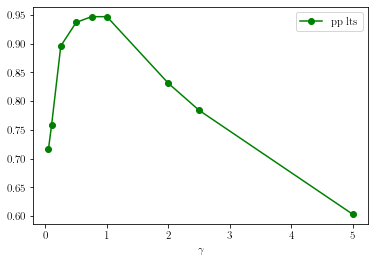

mean accuracy of noisy labels:  0.5460000000000002
mean lts measure of noisy labels:  0.7080000000000001


In [17]:
bt_df = pd.DataFrame(big_table)
bt_df.columns = ['gamma', 'est_accuracy', 'est_lts', 'pp_lts']
bt_df
plt.plot(bt_df['gamma'], bt_df['pp_lts'], '-go', label = 'pp lts')
plt.legend()
plt.xlabel('$\gamma$')
plt.savefig('fig5.jpg', dpi = 600)
plt.show()
print('mean accuracy of noisy labels: ', np.mean(bt_df['est_accuracy']))
print('mean lts measure of noisy labels: ', np.mean(bt_df['est_lts']))

## $w$

In [18]:
ws = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.5, 2]

gamma = 0.75 # parameter of post-processing

big_table = []

for w in ws:
    accuracy_table = []
    measure_table_est = []
    measure_table_pp = []
    for loop_idx in range(1000):
        is_correct = is_correct_array[loop_idx]
        wrong_states = wrong_states_array[loop_idx]

        df['iscorrect'] = is_correct
        df.loc[df.iscorrect, 'est'] = df.correct
        df.loc[df.iscorrect == False, 'est'] = wrong_states
        
        df['postproc'] = find_projection(df.est, gamma, fs)

        lts_est_current = lts_measure(df.correct, df.est, fs, w, sigma, lam, zeta)
        lts_pp_current = lts_measure(df.correct, df.postproc, fs, w, sigma, lam, zeta)

        accuracy_table.append(round(np.mean(is_correct), 2))
        measure_table_est.append(round(lts_est_current, 3))
        measure_table_pp.append(round(lts_pp_current, 3))
    
    big_table.append([w, 
                      round(np.mean(accuracy_table), 3),
                      round(np.mean(measure_table_est), 3),
                      round(np.mean(measure_table_pp), 3)])

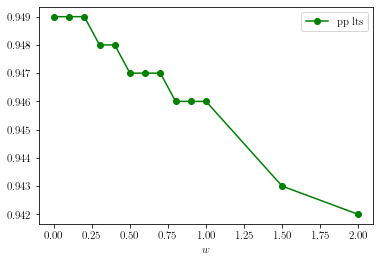

mean accuracy of noisy labels:  0.5460000000000002
mean lts measure of noisy labels:  0.697923076923077


In [19]:
bt_df = pd.DataFrame(big_table)
bt_df.columns = ['w', 'est_accuracy', 'est_lts', 'pp_lts']
bt_df
plt.plot(bt_df['w'], bt_df['pp_lts'], '-go', label = 'pp lts')
plt.legend()
plt.xlabel('$w$')
plt.savefig('fig6.jpg', dpi = 600)
plt.show()
print('mean accuracy of noisy labels: ', np.mean(bt_df['est_accuracy']))

## $\lambda$

In [52]:
is_correct_array = []
wrong_states_array = []
mu_1 = 1000
mu_2 = 600

for loop_idx in range(1000):
    is_correct, wrong_states = generate_state_seq(mu_1, mu_2)
    
    is_correct_array.append(is_correct)
    wrong_states_array.append(wrong_states)

In [53]:
w = 0.6
lambdas = [0, 0.001, 0.005, 0.01, 0.05, 0.075, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

big_table = []

for lam in lambdas:
    accuracy_table = []
    measure_table_est = []
    measure_table_pp = []
    for loop_idx in range(1000):
        is_correct = is_correct_array[loop_idx]
        wrong_states = wrong_states_array[loop_idx]

        df['iscorrect'] = is_correct
        df.loc[df.iscorrect, 'est'] = df.correct
        df.loc[df.iscorrect == False, 'est'] = wrong_states
        
        df['postproc'] = find_projection(df.est, gamma, fs)

        lts_est_current = lts_measure(df.correct, df.est, fs, w, sigma, lam, zeta)
        lts_pp_current = lts_measure(df.correct, df.postproc, fs, w, sigma, lam, zeta)

        accuracy_table.append(round(np.mean(is_correct), 2))
        measure_table_est.append(round(lts_est_current, 3))
        measure_table_pp.append(round(lts_pp_current, 3))
    
    big_table.append([lam, 
                      round(np.mean(accuracy_table), 3),
                      round(np.mean(measure_table_est), 3),
                      round(np.mean(measure_table_pp), 3)])

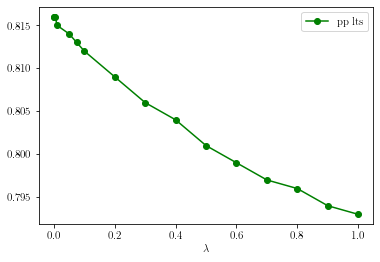

mean accuracy of noisy labels:  0.6199999999999999


In [54]:
bt_df = pd.DataFrame(big_table)
bt_df.columns = ['lambda', 'est_accuracy', 'est_lts', 'pp_lts']
bt_df
plt.plot(bt_df['lambda'], bt_df['pp_lts'], '-go', label = 'pp lts')
plt.legend()
plt.xlabel('$\lambda$')
plt.savefig('fig7.jpg', dpi = 600)
plt.show()
print('mean accuracy of noisy labels: ', np.mean(bt_df['est_accuracy']))